<a href="https://colab.research.google.com/github/gvasan07/AI_ML/blob/main/Car_price_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DataSci Lab-Dataset/CarPricePrediction.csv")

In [ ]:
print(data)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [ ]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

label encoding categorical variable

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['fuelsystem'])

LabelEncoder()

In [ ]:
le.classes_

array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype=object)

In [ ]:
data['fuelsystem']=le.transform(data['fuelsystem'])


In [ ]:
data['fuelsystem']

0      5
1      5
2      5
3      5
4      5
      ..
200    5
201    5
202    5
203    3
204    5
Name: fuelsystem, Length: 205, dtype: int64

checking relationship between indep and dep variables 

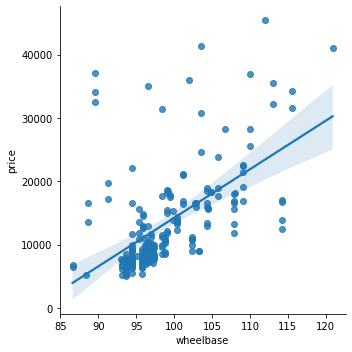

In [ ]:
sns.lmplot(x='wheelbase',y='price',data=data,order=1)
plt.ylabel('price')
plt.xlabel('wheelbase')
plt.show()

transforming to get better relationshp

In [ ]:
data['log_wheelbase']=np.log(data['wheelbase'])


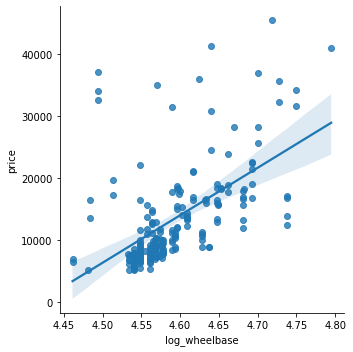

In [ ]:
sns.lmplot(x='log_wheelbase',y='price',data=data,order=1)
plt.ylabel('price')
plt.xlabel('log_wheelbase')
plt.show()

Obser: Not much improvement wrt wheelbase on log transformation

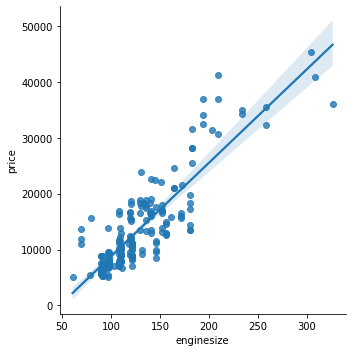

In [ ]:
sns.lmplot(x='enginesize',y='price',data=data,order=1)
plt.ylabel('price')
plt.xlabel('enginesize')
plt.show()

In [ ]:
data['log_esize']=np.log(data['enginesize'])

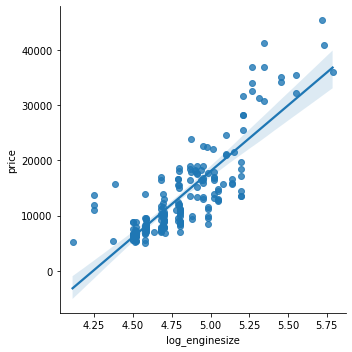

In [ ]:
sns.lmplot(x='log_esize',y='price',data=data,order=1)
plt.ylabel('price')
plt.xlabel('log_enginesize')
plt.show()

Obser: Slight improvement found wrt engine size

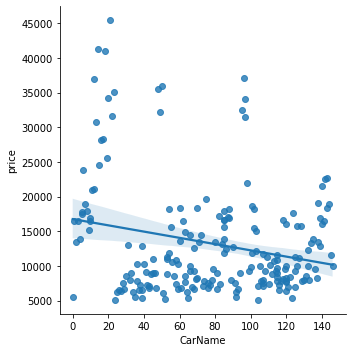

In [ ]:
sns.lmplot(x='CarName',y='price',data=data,order=1)
plt.ylabel('price')
plt.xlabel('CarName')
plt.show()

assessing linear relationship using residuals

Text(0, 0.5, 'True value')

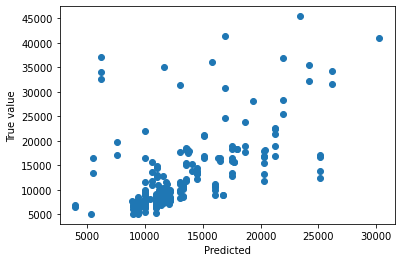

In [ ]:
reg=LinearRegression()
reg.fit(data[['wheelbase']],data[['price']])
pred=reg.predict(data[['wheelbase']])
error=data[['price']]-pred
plt.scatter(x=pred,y=data['price'])
plt.xlabel('Predicted')
plt.ylabel('True value')

Text(0.5, 0, 'input')

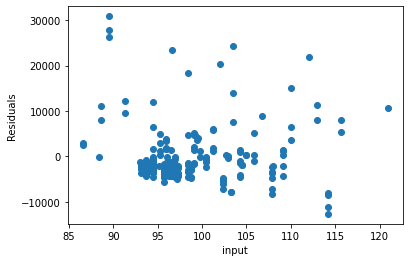

In [ ]:
plt.scatter(y=error,x=data['wheelbase'])
plt.ylabel('Residuals')
plt.xlabel('input')

Text(0, 0.5, 'True value')

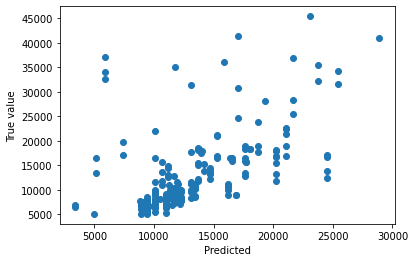

In [ ]:
reg=LinearRegression()
reg.fit(data[['log_wheel']],data[['price']])
pred=reg.predict(data[['log_wheel']])
error=data[['price']]-pred
plt.scatter(x=pred,y=data['price'])
plt.xlabel('Predicted')
plt.ylabel('True value')

prediction has improved after log transformation

Text(0.5, 0, 'log_wheelbase')

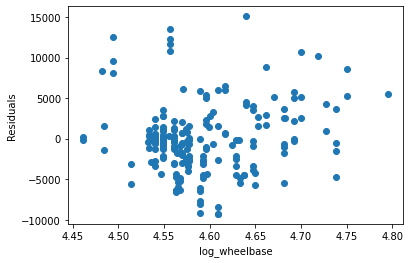

In [ ]:
plt.scatter(y=error,x=data['log_wheel'])
plt.ylabel('Residuals')
plt.xlabel('log_wheelbase')

obs: error is quite distributed with input

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


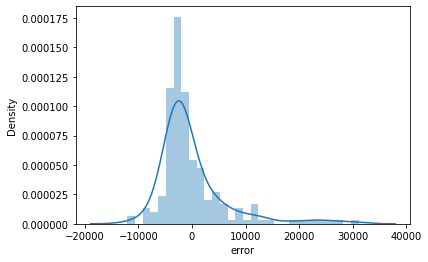

In [ ]:
sns.distplot(error,bins=30)
plt.xlabel('error')
plt.show()

obser: skewed to the left

Text(0, 0.5, 'True value')

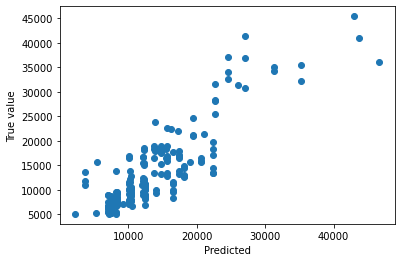

In [ ]:
reg=LinearRegression()
reg.fit(data[['enginesize']],data[['price']])
pred=reg.predict(data[['enginesize']])
error=data[['price']]-pred
plt.scatter(x=pred,y=data['price'])
plt.xlabel('Predicted')
plt.ylabel('True value')

Text(0.5, 0, 'enginesize')

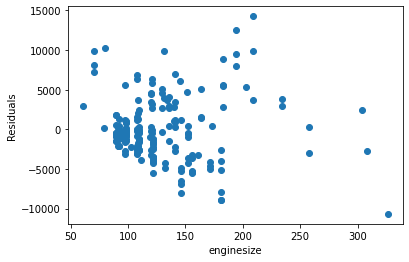

In [ ]:
plt.scatter(y=error,x=data['enginesize'])
plt.ylabel('Residuals')
plt.xlabel('enginesize')

Text(0, 0.5, 'True value')

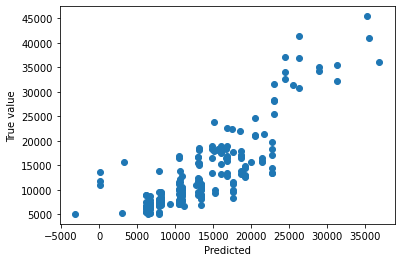

In [ ]:
reg=LinearRegression()
reg.fit(data[['log_esize']],data[['price']])
pred=reg.predict(data[['log_esize']])
error=data[['price']]-pred
plt.scatter(x=pred,y=data['price'])
plt.xlabel('Predicted')
plt.ylabel('True value')

Text(0.5, 0, 'log_enginesize')

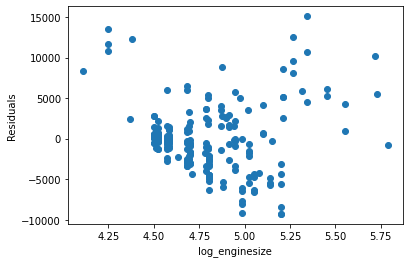

In [ ]:
plt.scatter(y=error,x=data['log_esize'])
plt.ylabel('Residuals')
plt.xlabel('log_enginesize')

same obser as above

Choosing fetures for final model

In [ ]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'log_wheel', 'log_esize', 'log_name'],
      dtype='object')

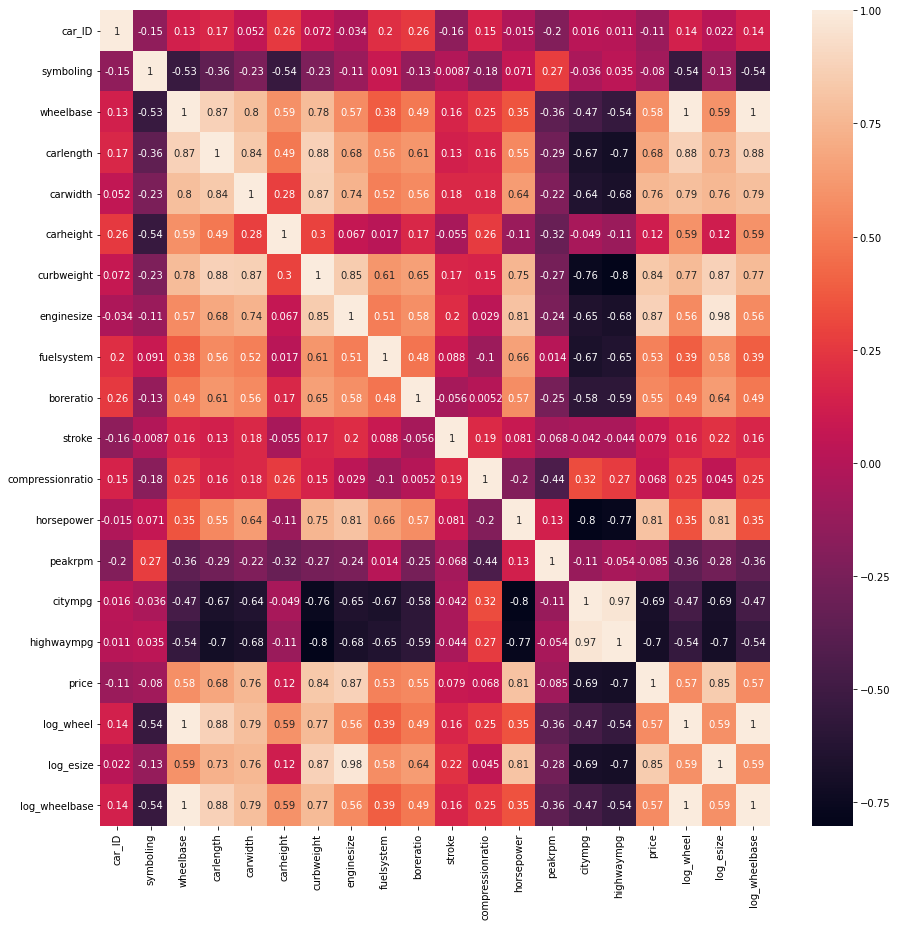

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

It can be seen that 'citympg' and 'highwaympg' have high correlation coefficient with other features. Thus eliminating them from the model[multicollinearity]

In [ ]:
cor=data.corr()['price'].sort_values()

In [ ]:
sel_feat=cor[cor>0.5].index
sel_feat=sel_feat.drop(['price','wheelbase','fuelsystem','boreratio','log_wheel'])
sel_feat

Index(['log_wheelbase', 'carlength', 'carwidth', 'horsepower', 'curbweight',
       'log_esize', 'enginesize'],
      dtype='object')

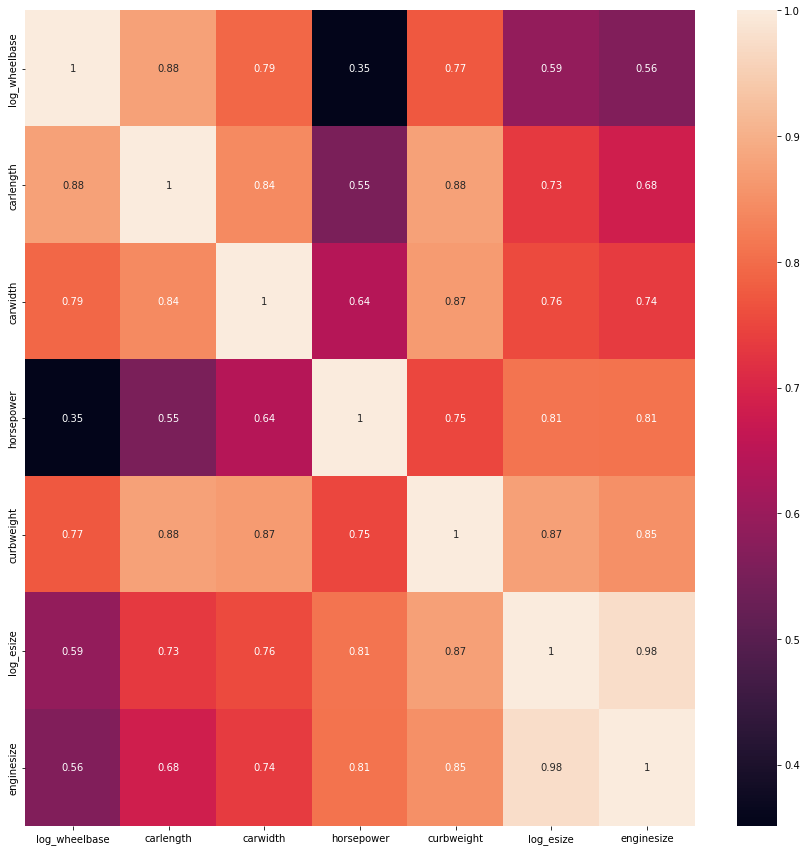

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(data[sel_feat].corr(), annot=True)

Above features are the ones to be taken for model building as they have higher corr coefficient with target var(price)


model after choosing features based on collinearity

Text(0, 0.5, 'True value')

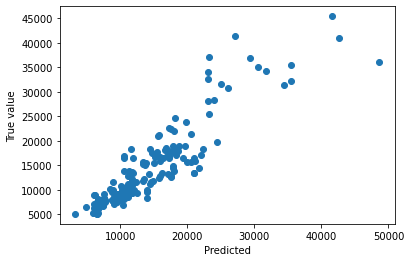

In [ ]:
reg=LinearRegression()
reg.fit(data[sel_feat],data[['price']])
pred=reg.predict(data[sel_feat])
error=data[['price']]-pred
plt.scatter(x=pred,y=data['price'])
plt.xlabel('Predicted')
plt.ylabel('True value')

In [ ]:
print(reg.score(data[sel_feat],data['price']))

0.8355023992526198


Scaling the dataset to improve model


In [ ]:
tansformer = MaxAbsScaler().fit(data[sel_feat])

In [ ]:
from pandas.core.frame import DataFrame
new=DataFrame(tansformer.transform(data[sel_feat]))
new

,0,1,2,3,4,5,6
0,0.935175,0.811148,0.886584,0.385417,0.626660,0.841130,0.398773
1,0.935175,0.811148,0.886584,0.385417,0.626660,0.841130,0.398773
2,0.948620,0.822681,0.905947,0.534722,0.694294,0.868148,0.466258
3,0.960001,0.848630,0.915629,0.354167,0.574766,0.810684,0.334356
4,0.959163,0.848630,0.918396,0.399306,0.694540,0.848927,0.417178
...,...,...,...,...,...,...,...
200,0.978582,0.907256,0.952974,0.395833,0.726021,0.855166,0.432515
201,0.978582,0.907256,0.951591,0.555556,0.749877,0.855166,0.432515
202,0.978582,0.907256,0.952974,0.465278,0.740777,0.890510,0.530675
203,0.978582,0.907256,0.952974,0.368056,0.791195,0.860000,0.444785


In [ ]:
new['price']=data['price']

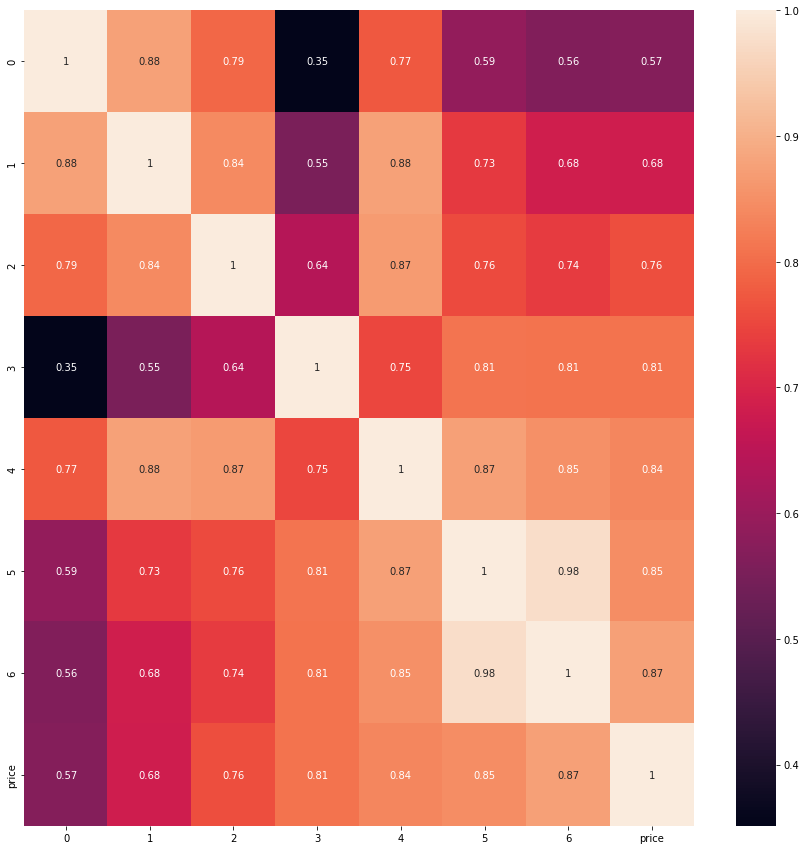

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(new.corr(), annot=True)

Text(0, 0.5, 'True value')

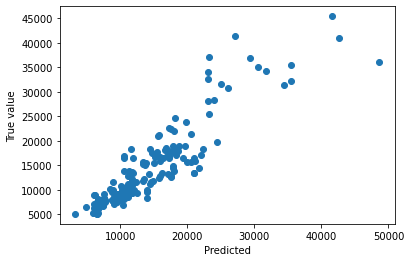

In [ ]:
reg=LinearRegression()
reg.fit(new,data[['price']])
pred=reg.predict(new)
error=data[['price']]-pred
plt.scatter(x=pred,y=data['price'])
plt.xlabel('Predicted')
plt.ylabel('True value')

In [ ]:
print(reg.score(new,data['price']))

0.8355023992526198
